## 10주 클러스터링
문제: k-Means 클러스터링

```sklearn.datasets.make_blobs```를 사용하여 데이터를 생성한다.

```
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)

```


이 데이터를 4개의 클러스터로 군집화하세요.
Python으로 구현해서 클러스터링하는데, 앞서 만든 함수 코드를 한 군데 수정해야 한다.

* (1) 클러스터의 중심점을 몇 회만에 찾는지, 매 반복 중심값만을 출력한다.
* (2) 배정된 클러스터가 맞는지 비교하여 동일한지 확인하세요.

In [0]:
import os
import pyspark

In [0]:
# 거리를 계산하는 함수 생성
def normDist(x1, x2):
    #dist=np.sqrt(sum(np.power(x1 - x2, 2))) #36.406001444695193
    dist = np.linalg.norm(x1 - x2) #36.406001444695193
    return dist

In [0]:
# 그래프를 그리는 함수 생성
def draw(x, centroids):
    import matplotlib.pyplot as plt
    #plt.subplot(5,2,iter)
    plt.scatter(x[:,0], x[:,1], color='blue')
    plt.scatter(centroids[:,0], centroids[:,1], color='red')

In [0]:
# 클러스터링 함수 생성
def cluster(x, k, centroids):
    row, col = x.shape
    clusterAssigned = np.zeros(shape=(row, k), dtype=float)
    # print (clusterAssigned)
    clusterUpdated=True
    iter = 1
    while(clusterUpdated):
        print ("\n\n====== Iteration {} ======".format(iter))
        
        # STEP 1: 할당하기
        for i in range(row):
            minDist = np.inf   # set arbitray max to minDist
            minIndex = -1      # set arbitray index to minIndex
            # compute distance and assign to closer cluster
            for j in range(k):
                # distance from centroids[j] to x[0]
                distJI = normDist(centroids[j], x[i])
                # print ("Distance {:.3f} between {} and {}".format(distJI, centroids[j], x[i]))
                # pick the closest centroid
                # swap 알고리즘 
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            print (".....Assigning {} to {}th centroid by {:.3f}".format(x[i], minIndex, minDist))
             # clusterAssigned[i] = [minIndex, minDist]   #-----changed
            clusterAssigned[i][0] = minIndex
            clusterAssigned[i][1] = minDist
        print ("\n.....Assigned clusters: \n {}".format(clusterAssigned))
        
        # STEP 2: 중심점 갱신하기
        _centroids=np.zeros(shape = (k, x.shape[1]), dtype=float)
        for cent in range(k):
            # read data by index and average them
            _centroids[cent] = np.mean(x[clusterAssigned[:,0]==cent],axis=0)
        # print ("Centroids updated: \n", _centroids)
        
        # STEP 3: 중심점 갱신 여부에 대해 판단하기
        comparison = np.equal(centroids, _centroids) # np.isclose() in case some tolerence is required
        if(comparison.all() == True):
            print ("\n.....NOT Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            clusterUpdated = False
            return centroids, clusterAssigned
        else:
            print ("\n.....Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            centroids = _centroids
            iter += 1

#### 1,2 답
그리고 2번은 값이 다르게 나왔다.

In [0]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)
# k와 centroids의 개수는 같다. 
k = 4
centroids = np.array([[-1,8],[-1.5,2.5],[1,4.5],[2,1.5]], dtype = float)
centroids, clusterAssigned = cluster(X, k, centroids)
print("----------------------------------------------------------------------------")
# draw(X, centroids)

# 배정된 클러스터 비교
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
print ("cluster label is....\n",kmeans.labels_)
print("y label is....\n",y)

====== Iteration 1 ======
.....Assigning [0.669787 3.59540802] to 2th centroid by 0.963
.....Assigning [-2.02396992 7.99569054] to 0th centroid by 1.024
.....Assigning [1.43289271 4.37679234] to 2th centroid by 0.450
.....Assigning [1.06923853 4.53068484] to 2th centroid by 0.076
.....Assigning [1.71444449 5.02521524] to 2th centroid by 0.887
.....Assigning [0.74387399 4.12240568] to 2th centroid by 0.456
.....Assigning [-2.04363942 4.06392123] to 1th centroid by 1.656
.....Assigning [-0.67860329 7.88799076] to 0th centroid by 0.340
.....Assigning [-0.04749204 5.47425256] to 2th centroid by 1.431
.....Assigning [-1.46976488 7.69183251] to 0th centroid by 0.562
.....Assigning [-0.86417686 6.86528639] to 0th centroid by 1.143
.....Assigning [-1.84838498 6.90859736] to 0th centroid by 1.382
.....Assigning [-1.27182547 7.13460392] to 0th centroid by 0.907
.....Assigning [-0.93428978 7.73253222] to 0th centroid by 0.275
.....Assigning [-0.73415741 7.44484466] to 0th centroid by 0.616
.....Assigning [3.18515794 0.08900822] to 3th centroid by 1.843
.....Assigning [1.35139348 2.06383637] to 3th centroid by 0.859
.....Assigning [-0.09701715 3.48456995] to 2th centroid by 1.495
.....Assigning [-1.93150361 2.9369806 ] to 1th centroid by 0.614
.....Assigning [2.73890793 0.15676817] to 3th centroid by 1.533
.....Assigning [2.33812285 3.43116792] to 2th centroid by 1.713
.....Assigning [-1.93673697 7.57276799] to 0th centroid by 1.030
.....Assigning [-1.98885366 3.24143178] to 1th centroid by 0.888
.....Assigning [ 2.33466499 -0.02408255] to 3th centroid by 1.560
.....Assigning [0.43899014 4.53592883] to 2th centroid by 0.562
.....Assigning [-1.58597553 2.51979529] to 1th centroid by 0.088
.....Assigning [-0.3731388 3.80619114] to 2th centroid by 1.538
.....Assigning [0.76752279 4.39759671] to 2th centroid by 0.254
.....Assigning [2.94821884 2.03519717] to 3th centroid by 1.089
.....Assigning [2.76253526 0.78970876] to 3th centroid by 1.042
.....Assigning [1.65179125 0.68193176] to 3th centroid by 0.889
.....Assigning [-0.8731169 6.87422542] to 0th centroid by 1.133
.....Assigning [2.16172321 0.6565951 ] to 3th centroid by 0.859
.....Assigning [2.06156753 1.96918596] to 3th centroid by 0.473
.....Assigning [-1.15845639 3.47120626] to 1th centroid by 1.030
.....Assigning [1.1641107 3.79132988] to 2th centroid by 0.727
.....Assigning [-1.54707525 8.99317925] to 0th centroid by 1.134
.....Assigning [1.81336135 1.6311307 ] to 3th centroid by 0.228
.....Assigning [0.04968579 8.63737679] to 0th centroid by 1.228
.....Assigning [-1.97375691 2.42201914] to 1th centroid by 0.480
.....Assigning [1.06269622 5.17635143] to 2th centroid by 0.679
.....Assigning [-1.42689992 3.29890112] to 1th centroid by 0.802
.....Assigning [-1.63442682 6.50141812] to 0th centroid by 1.627
.....Assigning [-2.07459735 3.58809203] to 1th centroid by 1.230
.....Assigning [-1.94364473 2.82810154] to 1th centroid by 0.552
.....Assigning [-1.98351709 8.3420778 ] to 0th centroid by 1.041
.....Assigning [1.53278923 0.55035386] to 3th centroid by 1.058
.....Assigning [-1.90841166 3.32374224] to 1th centroid by 0.919
.....Assigning [0.67047877 4.04094275] to 2th centroid by 0.565
.....Assigning [0.44359863 3.11530945] to 2th centroid by 1.492
.....Assigning [0.22459286 4.77028154] to 2th centroid by 0.821
.....Assigning [1.868336 0.93136287] to 3th centroid by 0.584
.....Assigning [-1.18094952 2.79290301] to 1th centroid by 0.433
.....Assigning [-1.78799614 4.0274405 ] to 1th centroid by 1.554
.....Assigning [-0.85092246 2.26992336] to 1th centroid by 0.689
.....Assigning [-1.26285145 7.39264147] to 0th centroid by 0.662
.....Assigning [-0.78518144 8.32956251] to 0th centroid by 0.393
.....Assigning [2.49272186 0.97505341] to 3th centroid by 0.720
.....Assigning [2.26908736 1.32160756] to 3th centroid by 0.323
.....Assigning [-0.5354379 8.02562558] to 0th centroid by 0.465
.....Assigning [-1.46065212 7.01048924] to 0th centroid by 1.091
.....Assigning [1.41281595 1.5303347 ] to 3

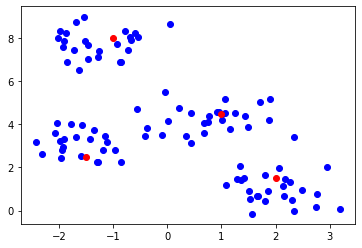

In [0]:
# 그래프 출력
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)
# k와 centroids의 개수는 같다. 
k = 4
centroids = np.array([[-1,8],[-1.5,2.5],[1,4.5],[2,1.5]], dtype = float)
draw(X, centroids)